#IMPORT LIBRARY

In [65]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#IMPORT DATAFRAME CSV

In [66]:
df = pd.read_csv('Telco_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [67]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#MISSING VALUE CHECKING

**MISSING VALUE**

Berikut merupakan langkah-langkah mencari missing value.

In [68]:
#Cek terlebih dahulu data yang missing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [69]:
#Untuk tau detail kolom missing value
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [70]:
#kolom TotalCharges salah terdeteksi sebagai objek
#Kolom ini error sehingga perlu diperbaiki
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [71]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [72]:
#Cek kembali Missing Values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [73]:
#Hilangkan missing value dengan dropna
#Karena missingnya sedikit jadi bisa dihilangkan rownya

df = df.dropna(subset=['TotalCharges'])

In [74]:
#Cek kembali Missing Values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**MENINJAU VALUE**

Ketika ditinjau lebih lanjut ada beberapa jawaban yang bernilai sama.


**Contoh :** 'No' dan 'No phone service'

Jika ditinjau lebih lanjut keduanya sama-sama bernilai "tidak melakukan" sehingga jawaban "No phone service" bisa dikategorikan ke dalam jawaban / value "No". Dari hal tersebut akan lebih mudah untuk mengkategorikannya karena labelnya jadi ada 2 hanya "Yes" dan "No" sehingga categorical data encodingnya akan menjadi lebih mudah.


In [75]:
#Kolom data tidak ada yang missing (Nan)
#Namun setelah ditinjau lebih lanjut pada MultipleLines, terdapat jawaban sama
#Berikut hasil cek jumlah jawaban

df['MultipleLines'].value_counts()

#Karena jawaban No dan No phone service bernilai sama maka bisa diubah menjadi no semua 

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [76]:
#Mengubah no phone service menjadi no

df['MultipleLines'] = df['MultipleLines'].replace(['No phone service'], 'No')

#Karena value tersebut bernilai sama dan akan memudahkan ketika proses categorical data encoding

In [77]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [78]:
#Setelah ditinjau lebih lanjut pada OnlineSecurity, terdapat jawaban bernilai sama

df['OnlineSecurity'].value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

In [79]:
#Mengubah no internet service menjadi no

df['OnlineSecurity'] = df['OnlineSecurity'].replace(['No internet service'], 'No')
df.head()

#Karena value tersebut bernilai sama dan akan memudahkan ketika proses categorical data encoding

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [80]:
#Setelah ditinjau lebih lanjut, terdapat jawaban bernilai sama

df['OnlineBackup'].value_counts()

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

In [81]:
#Mengubah no internet service menjadi no

df['OnlineBackup'] = df['OnlineBackup'].replace(['No internet service'], 'No')
df.head()

#Karena value tersebut bernilai sama dan akan memudahkan ketika proses categorical data encoding

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [82]:
#Setelah ditinjau lebih lanjut, terdapat jawaban bernilai sama

df['DeviceProtection'].value_counts()

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

In [83]:
#Mengubah no internet service menjadi no

df['DeviceProtection'] = df['DeviceProtection'].replace(['No internet service'], 'No')
df.head()

#Karena value tersebut bernilai sama dan akan memudahkan ketika proses categorical data encoding

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [84]:
#Setelah ditinjau lebih lanjut, terdapat jawaban bernilai sama

df['TechSupport'].value_counts()

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

In [85]:
#Mengubah no internet service menjadi no

df['TechSupport'] = df['TechSupport'].replace(['No internet service'], 'No')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [86]:
#Setelah ditinjau lebih lanjut, terdapat jawaban bernilai sama

df['StreamingMovies'].value_counts()

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64

In [87]:
#Mengubah no internet service menjadi no

df['StreamingMovies'] = df['StreamingMovies'].replace(['No internet service'], 'No')
df.head()

#Karena value tersebut bernilai sama dan akan memudahkan ketika proses categorical data encoding

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [88]:
#Setelah ditinjau lebih lanjut, terdapat jawaban bernilai sama

df['StreamingTV'].value_counts()

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64

In [89]:
#Mengubah no internet service menjadi no

df['StreamingTV'] = df['StreamingTV'].replace(['No internet service'], 'No')
df.head()

#Karena value tersebut bernilai sama dan akan memudahkan ketika proses categorical data encoding

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#CATEGORICAL DATA ENCODING

**CATEGORICAL DATA ENCODING**

proses mengubah data kategori menjadi format integer sehingga data dengan nilai kategori yang dikonversi dapat diberikan kepada model untuk memberikan dan meningkatkan prediksi. 

In [90]:
#Mengkategorikan data kategorikal menjadi numerik
#dimulai dari kolom 'gender'
#Karena terdapat 2 kategori (male and female)
#Dapat menggunakan Label encoding (1 dan 0)
df['gender'] = df['gender'].astype('category').cat.codes
df.head()
#1 = Male
#0 = Female

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [91]:
#Dalam "Partner" terdapat 2 kategori (yes/no)
#Dapat menggunakan Label encoding (0 dan 1)

df['Partner'] = df['Partner'].astype('category').cat.codes
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,0,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,0,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,0,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,0,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [92]:
#Dalam "Dependents"terdapat 2 kategori (yes/no)
#Dapat menggunakan Label encoding (0 dan 1)

df['Dependents'] = df['Dependents'].astype('category').cat.codes
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,0,0,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,0,0,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,0,0,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,0,0,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [93]:
#Dalam "PhoneService"terdapat 2 kategori (yes/no)
#Dapat menggunakan Label encoding (0 dan 1)

df['PhoneService'] = df['PhoneService'].astype('category').cat.codes
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,0,0,45,0,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [94]:
#Dalam "MultipleLines"terdapat 2 kategori (yes/no)
#Dapat menggunakan Label encoding (0 dan 1)

df['MultipleLines'] = df['MultipleLines'].astype('category').cat.codes
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [95]:
#Pada kolom Internet Service belum jelas diketahui jumlah keseluruhan jawaban
#Untuk melihat berapa value maka bisa dilakukan hal berikut

df['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [96]:
#Pada "InternetService" terdapat 3 value
#Maka dapat menggunakan one hot encoding

dummies_InternetService = pd.get_dummies(df['InternetService'],prefix='InternetService')
dummies_InternetService.head()

,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0


In [97]:
df = pd.concat([df, dummies_InternetService], axis=1)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,1,0


In [98]:
df = df.drop('InternetService',axis=1)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,0,1,0,1,0,0,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,No,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,0,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0
4,9237-HQITU,0,0,0,0,2,1,0,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,1,0


In [99]:
#Dalam "OnlineSecurity" terdapat 2 kategori (yes/no)
#Dapat menggunakan Label encoding (0 dan 1)

df['OnlineSecurity'] = df['OnlineSecurity'].astype('category').cat.codes
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,0,1,0,1,0,0,0,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,No,...,No,One year,No,Mailed check,56.95,1889.50,No,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,1,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,1,0


In [100]:
#Dalam "OnlineBackup" terdapat 2 kategori (yes/no)
#Dapat menggunakan Label encoding (0 dan 1)

df['OnlineBackup'] = df['OnlineBackup'].astype('category').cat.codes
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,No,One year,No,Mailed check,56.95,1889.50,No,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,1,0


In [101]:
#Dalam "DeviceProtection" terdapat 2 kategori (yes/no)
#Dapat menggunakan Label encoding (0 dan 1)

df['DeviceProtection'] = df['DeviceProtection'].astype('category').cat.codes
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,No,One year,No,Mailed check,56.95,1889.50,No,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,1,0


In [102]:
#Dalam "TechSupport" terdapat 2 kategori (yes/no)
#Dapat menggunakan Label encoding (0 dan 1)

df['TechSupport'] = df['TechSupport'].astype('category').cat.codes
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,No,One year,No,Mailed check,56.95,1889.50,No,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,1,0


In [103]:
#Dalam "StreamingTV" terdapat 2 kategori (yes/no)
#Dapat menggunakan Label encoding (0 dan 1)

df['StreamingTV'] = df['StreamingTV'].astype('category').cat.codes
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,No,One year,No,Mailed check,56.95,1889.50,No,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,1,0


In [104]:
#Dalam "StreamingMovies" terdapat 2 kategori (yes/no)
#Dapat menggunakan Label encoding (0 dan 1)

df['StreamingMovies'] = df['StreamingMovies'].astype('category').cat.codes
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,...,0,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,0,One year,No,Mailed check,56.95,1889.50,No,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,...,0,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,1,0


In [105]:
#Cek Jumlah "Contract"
df['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [106]:
#Pada "Contract" terdapat 3 value
#Maka dapat menggunakan one hot encoding

dummies_Contract = pd.get_dummies(df['Contract'],prefix='Contract')
dummies_Contract.head()

,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0


In [107]:
df = pd.concat([df, dummies_Contract], axis=1)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,...,Electronic check,29.85,29.85,No,1,0,0,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,Mailed check,56.95,1889.50,No,1,0,0,0,1,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,Mailed check,53.85,108.15,Yes,1,0,0,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,...,Bank transfer (automatic),42.30,1840.75,No,1,0,0,0,1,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,Electronic check,70.70,151.65,Yes,0,1,0,1,0,0


In [108]:
df = df.drop('Contract',axis=1)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,...,Electronic check,29.85,29.85,No,1,0,0,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,Mailed check,56.95,1889.50,No,1,0,0,0,1,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,Mailed check,53.85,108.15,Yes,1,0,0,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,...,Bank transfer (automatic),42.30,1840.75,No,1,0,0,0,1,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,Electronic check,70.70,151.65,Yes,0,1,0,1,0,0


In [109]:
#Dalam "PaperlessBilling" terdapat 2 kategori (yes/no)
#Dapat menggunakan Label encoding (0 dan 1)

df['PaperlessBilling'] = df['PaperlessBilling'].astype('category').cat.codes
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,...,Electronic check,29.85,29.85,No,1,0,0,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,Mailed check,56.95,1889.50,No,1,0,0,0,1,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,Mailed check,53.85,108.15,Yes,1,0,0,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,...,Bank transfer (automatic),42.30,1840.75,No,1,0,0,0,1,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,Electronic check,70.70,151.65,Yes,0,1,0,1,0,0


In [110]:
#Cek Jumlah "PaymentMethod"

df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [111]:
#Terdapat 4 Values
#Dapat Menggunakan Frequency Encoding
freq_et = df['PaymentMethod'].value_counts().reset_index()
freq_et.rename(columns={"index": "PaymentMethod", "PaymentMethod": "freq_PaymentMethod"}, inplace = True)
freq_et['pct_PaymentMethod'] = round((freq_et['freq_PaymentMethod']/freq_et['freq_PaymentMethod'].sum())*100,2)
freq_et

,PaymentMethod,freq_PaymentMethod,pct_PaymentMethod
0,Electronic check,2365,33.63
1,Mailed check,1604,22.81
2,Bank transfer (automatic),1542,21.93
3,Credit card (automatic),1521,21.63


In [112]:
df = df.merge(freq_et[['PaymentMethod','pct_PaymentMethod']], on='PaymentMethod', how='inner')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,pct_PaymentMethod
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,...,29.85,29.85,No,1,0,0,1,0,0,33.63
1,9237-HQITU,0,0,0,0,2,1,0,0,0,...,70.70,151.65,Yes,0,1,0,1,0,0,33.63
2,9305-CDSKC,0,0,0,0,8,1,1,0,0,...,99.65,820.50,Yes,0,1,0,1,0,0,33.63
3,7892-POOKP,0,0,1,0,28,1,1,0,0,...,104.80,3046.05,Yes,0,1,0,1,0,0,33.63
4,5129-JLPIS,1,0,0,0,25,1,0,1,0,...,105.50,2686.05,No,0,1,0,1,0,0,33.63


In [113]:
#Dalam "Churn" terdapat 2 kategori (yes/no)
#Dapat menggunakan Label encoding (0 dan 1)

df['Churn'] = df['Churn'].astype('category').cat.codes
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,pct_PaymentMethod
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,...,29.85,29.85,0,1,0,0,1,0,0,33.63
1,9237-HQITU,0,0,0,0,2,1,0,0,0,...,70.70,151.65,1,0,1,0,1,0,0,33.63
2,9305-CDSKC,0,0,0,0,8,1,1,0,0,...,99.65,820.50,1,0,1,0,1,0,0,33.63
3,7892-POOKP,0,0,1,0,28,1,1,0,0,...,104.80,3046.05,1,0,1,0,1,0,0,33.63
4,5129-JLPIS,1,0,0,0,25,1,0,1,0,...,105.50,2686.05,0,0,1,0,1,0,0,33.63


#ANOMALIES AND OUTLIER HANDLING

**ANOMALIES AND OUTLIER HANDLING**

Pada bagian ini akan dilakukan mengatasi data yang tidak normal

In [114]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,pct_PaymentMethod
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,...,64.798208,2283.300441,0.265785,0.343572,0.440273,0.216155,0.551052,0.209329,0.239619,26.000779
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,...,30.085974,2266.771362,0.441782,0.474934,0.496455,0.411650,0.497422,0.406858,0.426881,5.446823
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.630000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.930000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,22.810000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,89.862500,3794.737500,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,33.630000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.630000


Langkah awal yaitu menentukan data mana yang tidak terlihat normal persebarannya. Dari hasil tinjauan data yang tidak terlihat normal yaitu tenure, monthlycharges, dan total charges. Hal tersebut karena perbedaan antara nilai max yang besar, tetapi median, rata-rata, dsb kurang sesuai.


**Penyelesaian menggunakan Logaritma**

In [115]:
df[['tenure']].describe()

,tenure
count,7032.000000
mean,32.421786
std,24.545260
min,1.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


<Axes: >

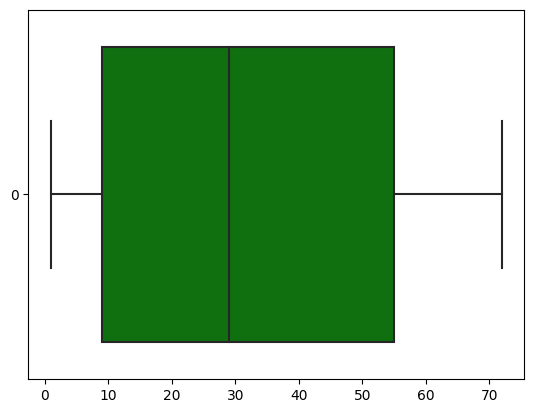

In [116]:
#Visualisasi yang jelas menentukan outlier
#Menggunakan bloxspot
sns.boxplot(df['tenure'],color='green',orient='h')

In [117]:
df['log_tenure'] = np.log(df['tenure']+1)

Text(0.5, 0, '')

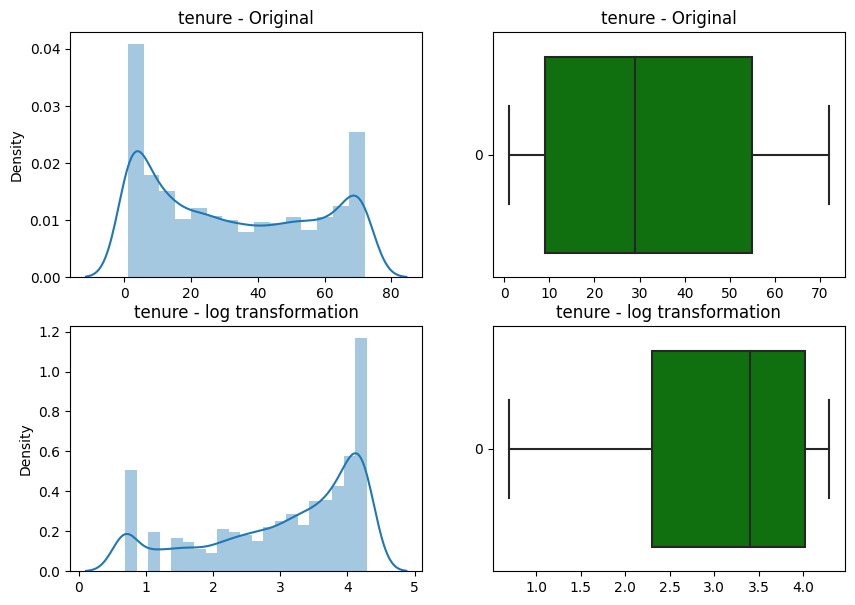

In [118]:
f,ax = plt.subplots(2,2,figsize=(10,7))

g = sns.distplot(df['tenure'],kde=True, ax=ax[0,0])
ax[0,0].set_title('tenure - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(df['tenure'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('tenure - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log(df['tenure']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('tenure - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log(df['tenure']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('tenure - log transformation')
ax[1,1].set_xlabel('')

In [119]:
df[['MonthlyCharges']].describe()

,MonthlyCharges
count,7032.000000
mean,64.798208
std,30.085974
min,18.250000
25%,35.587500
50%,70.350000
75%,89.862500
max,118.750000


<Axes: >

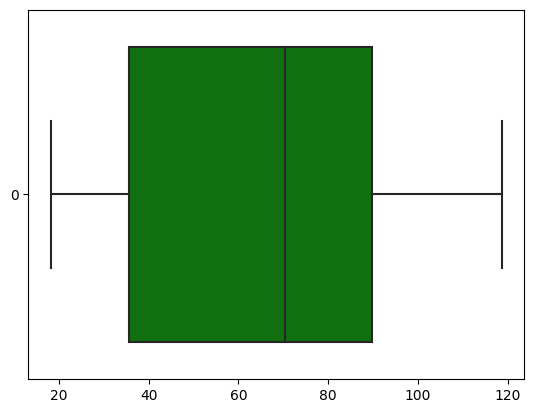

In [120]:
#Visualisasi yang jelas menentukan outlier
#Menggunakan bloxspot
sns.boxplot(df['MonthlyCharges'],color='green',orient='h')

In [121]:
df['log_MonthlyCharges'] = np.log(df['MonthlyCharges']+1)

Text(0.5, 0, '')

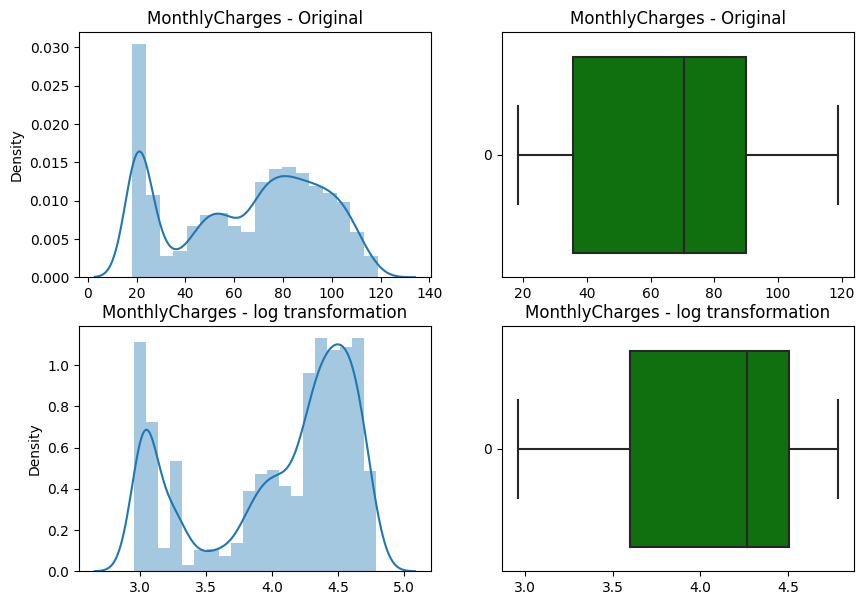

In [122]:
f,ax = plt.subplots(2,2,figsize=(10,7))

g = sns.distplot(df['MonthlyCharges'],kde=True, ax=ax[0,0])
ax[0,0].set_title('MonthlyCharges - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(df['MonthlyCharges'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('MonthlyCharges - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log(df['MonthlyCharges']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('MonthlyCharges - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log(df['MonthlyCharges']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('MonthlyCharges - log transformation')
ax[1,1].set_xlabel('')

In [123]:
df[['TotalCharges']].describe()

,TotalCharges
count,7032.000000
mean,2283.300441
std,2266.771362
min,18.800000
25%,401.450000
50%,1397.475000
75%,3794.737500
max,8684.800000


<Axes: >

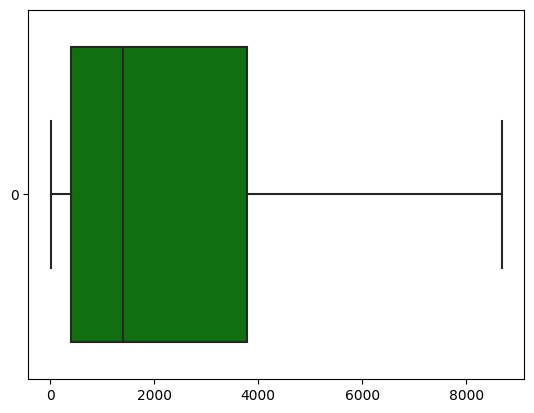

In [124]:
#Visualisasi yang jelas menentukan outlier
#Menggunakan bloxspot
sns.boxplot(df['TotalCharges'],color='green',orient='h')

In [125]:
df['log_TotalCharges'] = np.log(df['TotalCharges']+1)

Text(0.5, 0, '')

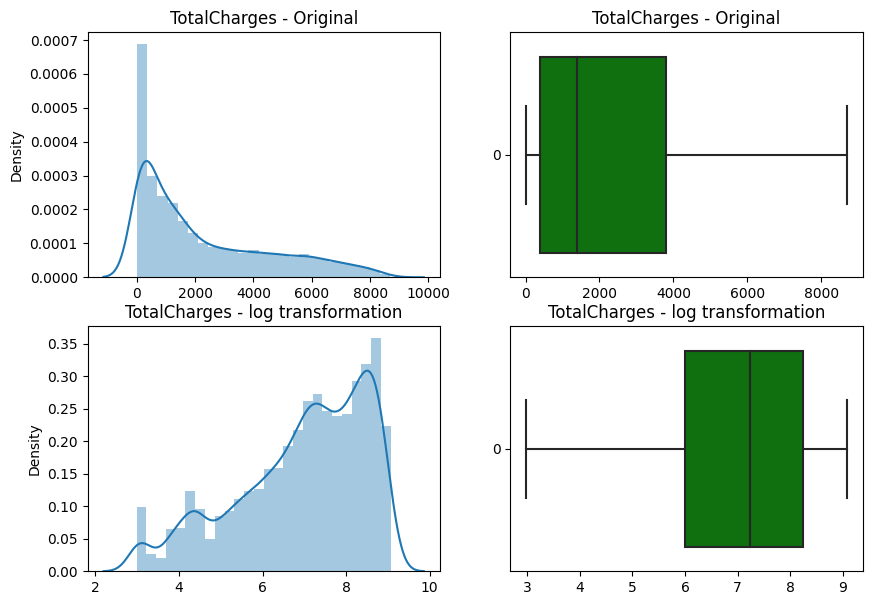

In [126]:
f,ax = plt.subplots(2,2,figsize=(10,7))

g = sns.distplot(df['TotalCharges'],kde=True, ax=ax[0,0])
ax[0,0].set_title('TotalCharges - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(df['TotalCharges'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('TotalCharges - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log(df['TotalCharges']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('TotalCharges - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log(df['TotalCharges']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('TotalCharges - log transformation')
ax[1,1].set_xlabel('')